# Student Alcohol Consumption 

In this problem with datastes I have tried to figure how Total alcohol consumption by a student in a week depends on the factors listed in the dataset.Since it is a multiclass problem therefore multiclass classifier has been used like SVM,KNN,Decision Tree,etc. 

In [2]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Input data files are available in the "input/" directory.
math=pd.read_csv("input/student-mat.csv")  #reading the train dataset
port=pd.read_csv("input/student-por.csv")  #reading the test dataset

In [4]:
math=math.append(port)   # merging both datastes into a single datasets

In [5]:
math.duplicated().sum()  #Checking for duplicates

0

In [6]:
math.info()             #getting datasets info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null

In [7]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
math.columns   #listing the name of column 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
#checking for null enteries
math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

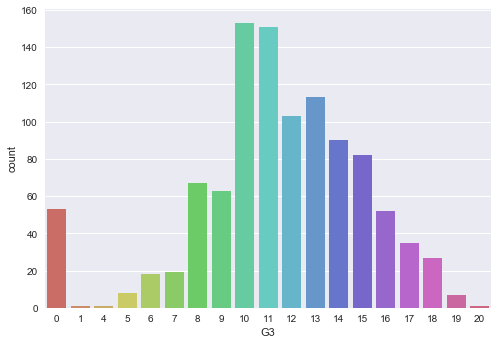

In [10]:
#Distribution across G3
sns.countplot(x='G3',data=math, palette='hls')
plt.show()

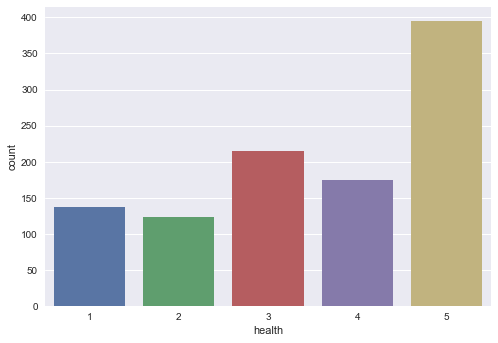

In [11]:
#Students health distribution
sns.countplot(x='health',data=math)
plt.show()

In [12]:
#combining workday and weekend alcohol consumption
math['Dalc']=math['Dalc']+math['Walc']

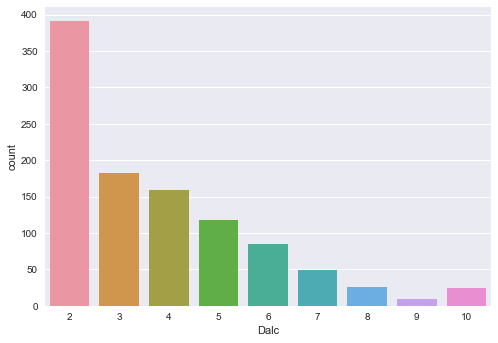

In [13]:
#distribution across total alchol cosumption
sns.countplot(x='Dalc',data=math)
plt.show()

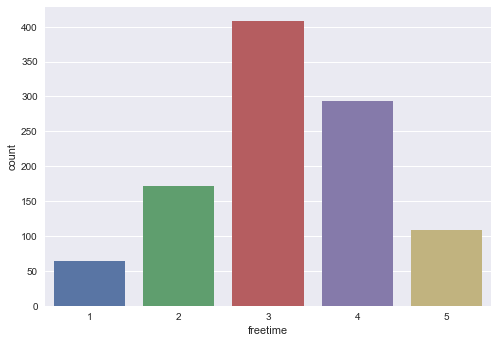

In [14]:
#distribution across freetime
sns.countplot(x='freetime',data=math)
plt.show()

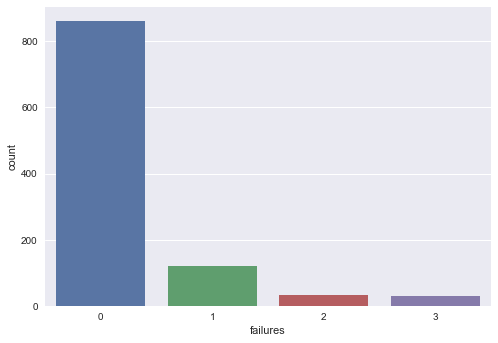

In [15]:
#past class failure distribution
sns.countplot(x='failures',data=math)
plt.show()

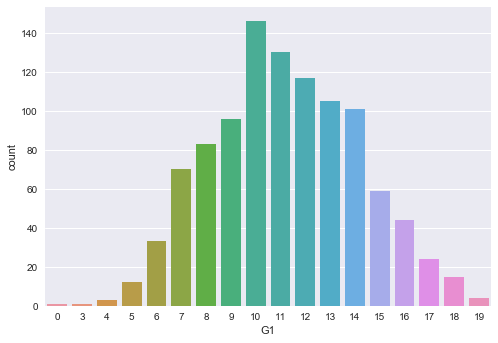

In [16]:
#first period grade distribution
sns.countplot(x='G1',data=math)
plt.show()

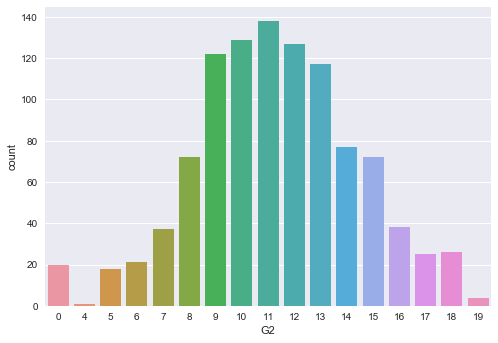

In [17]:
#second period grade distribution
sns.countplot(x='G2',data=math)
plt.show()

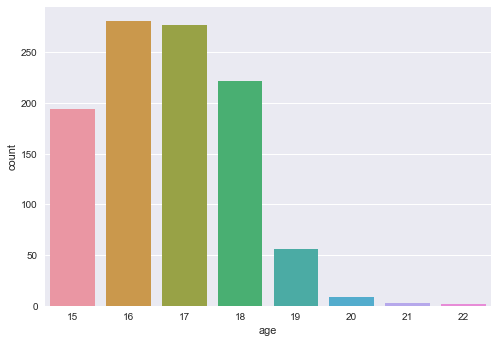

In [18]:
#Distribution across age
sns.countplot(x='age',data=math)
plt.show()

In [19]:
math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.124714,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,-0.018261,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,0.012543,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.104649,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.221255,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.122773,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.100126,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.150736,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.374447,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.124714,-0.018261,0.012543,0.104649,-0.221255,0.122773,-0.100126,0.150736,0.374447,1.000000,0.934148,0.098979,0.151209,-0.161241,-0.143128,-0.134244


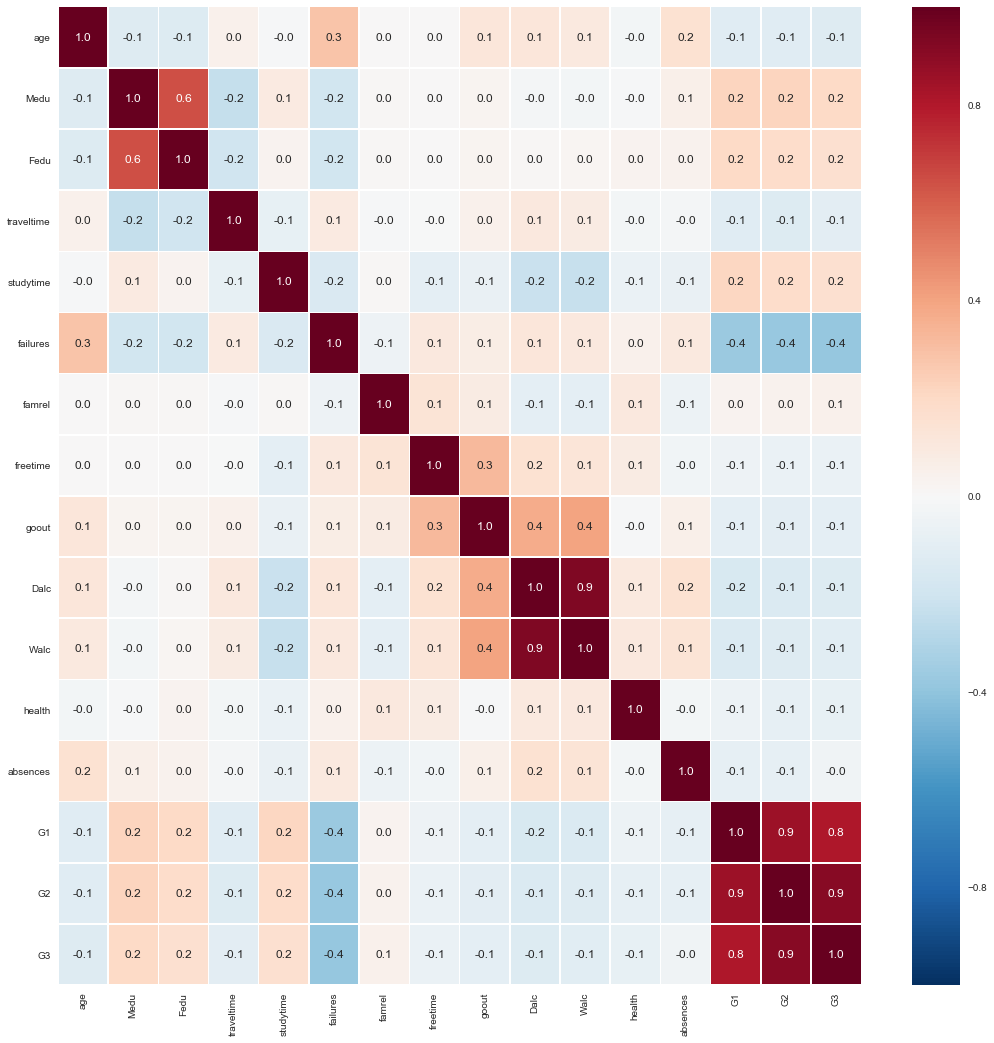

In [20]:
#heat map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(math.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [21]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [22]:
math.drop(math.columns[[0,1,3,4,5,8,9,10,11,12,13,15,16,17,18,19,20,21,22,27]],axis=1, inplace=True)  #Dropping the variables which we don't need

In [23]:
math=math[[ 'Dalc','G3', 'G2', 'G1', 'absences', 'health', 'goout', 'freetime',
           'famrel', 'failures', 'Fedu', 'Medu', 'age']]  #Rearranging the Column

In [24]:
math.columns

Index(['Dalc', 'G3', 'G2', 'G1', 'absences', 'health', 'goout', 'freetime',
       'famrel', 'failures', 'Fedu', 'Medu', 'age'],
      dtype='object')

In [25]:
math.shape     #Getting the shape of the final datasets

(1044, 13)

In [26]:
#Dividing the datastes into train and test respectively
X=math.iloc[:,1:]
y=math.iloc[:,0]
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [27]:
X_train.shape  

(783, 12)

In [28]:
y_train.shape 

(783,)

In [29]:
y_test.shape

(261,)

In [30]:
l1=[]  #for storing the name of classifier
l2=[]  #for storing accuracy of classifier
error=[]  #storing the error fo the respective classifier

In [31]:
#Multivariate Logistic Regression
l1.append('Multivariate LogisticRegression')
classifier_1=LogisticRegression(solver='newton-cg',random_state=0)
classifier_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred=classifier_1.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[74  5  4  4  5  0  0  0  1]
 [41  1  1  0  5  0  1  0  0]
 [37  0  2  0  0  0  0  0  0]
 [20  1  1  2  3  0  0  0  0]
 [14  1  1  0  6  0  0  0  0]
 [12  0  0  1  3  0  0  0  0]
 [ 5  0  0  0  2  0  1  0  0]
 [ 0  1  0  0  2  0  0  0  0]
 [ 1  0  0  1  1  1  0  0  0]]


In [33]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
l2.append(classifier_1.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy of logistic regression classifier on test set: 0.33
Mean Absolute Error: 1.7126436781609196
Mean Squared Error: 5.934865900383142
Root Mean Squared Error: 2.4361580204049043


In [34]:
#Decision Tree Classifier
l1.append('DecisionTreeClassifier')
classifier_2=DecisionTreeClassifier(random_state=0)
classifier_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [35]:
y_pred=classifier_2.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[54 18  8  9  3  1  0  0  0]
 [12 19  7  3  3  2  0  0  3]
 [13  4 12  5  0  3  0  0  2]
 [ 6  3  6  9  1  1  1  0  0]
 [ 4  1  5  2  5  1  0  2  2]
 [ 3  1  5  1  0  5  0  0  1]
 [ 4  2  0  1  1  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  3]]


In [36]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
l2.append(classifier_2.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy of Decision Tree classifier on test set: 0.41
Mean Absolute Error: 1.4291187739463602
Mean Squared Error: 4.823754789272031
Root Mean Squared Error: 2.1963048033622363


In [37]:
#KNN
l1.append('KNeighborsClassifier')
classifier_3=KNeighborsClassifier()
classifier_3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
y_pred=classifier_3.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[66  9 10  4  1  2  0  0  1]
 [36  7  1  3  2  0  0  0  0]
 [20  4  9  5  1  0  0  0  0]
 [17  6  0  2  1  0  1  0  0]
 [15  3  2  0  2  0  0  0  0]
 [ 8  2  3  1  2  0  0  0  0]
 [ 6  1  1  0  0  0  0  0  0]
 [ 0  1  0  1  1  0  0  0  0]
 [ 2  1  0  0  1  0  0  0  0]]


In [39]:
print('Accuracy of K nearest neighbour on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
l2.append(classifier_3.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy of K nearest neighbour on test set: 0.33
Mean Absolute Error: 1.7203065134099618
Mean Squared Error: 6.180076628352491
Root Mean Squared Error: 2.485975991105403


In [40]:
#LDA
l1.append('LDA')
classifier_4=LDA(n_components=1)
classifier_4.fit(X_train,y_train)
y_pred=classifier_4.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[75  2  4  4  5  0  0  0  3]
 [39  1  1  1  6  0  1  0  0]
 [35  0  1  1  1  1  0  0  0]
 [18  1  2  1  3  0  0  1  1]
 [11  1  1  1  7  1  0  0  0]
 [11  0  1  1  3  0  0  0  0]
 [ 5  0  0  0  2  0  1  0  0]
 [ 0  0  0  1  2  0  0  0  0]
 [ 1  0  0  1  1  1  0  0  0]]


In [41]:
print('Accuracy of LDA on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
l2.append(classifier_4.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy of LDA on test set: 0.33
Mean Absolute Error: 1.7432950191570882
Mean Squared Error: 6.256704980842912
Root Mean Squared Error: 2.5013406367072264


In [42]:
#Random Forest Classifier
l1.append('Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier
classifier_5=RandomForestClassifier(n_estimators=100,random_state=0)   
classifier_5.fit(X_train, y_train)  
y_pred = classifier_5.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[78  8  4  1  2  0  0  0  0]
 [21 21  3  0  3  0  0  0  1]
 [22  0 12  3  2  0  0  0  0]
 [16  1  2  6  2  0  0  0  0]
 [ 9  1  2  1  9  0  0  0  0]
 [ 7  0  1  3  1  4  0  0  0]
 [ 4  1  1  0  2  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  2]]


In [43]:
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
l2.append(classifier_5.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy of Random Forest Classifier on test set: 0.51
Mean Absolute Error: 1.2452107279693487
Mean Squared Error: 4.3486590038314175
Root Mean Squared Error: 2.085343857456467


In [44]:
#SVM
l1.append('SVM')
from sklearn.svm import SVC 
classifier_6 = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
y_pred = classifier_6.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[84  0  1  2  6  0  0  0  0]
 [43  0  0  0  5  0  1  0  0]
 [38  0  0  0  1  0  0  0  0]
 [23  0  0  1  2  0  0  0  1]
 [16  0  0  0  6  0  0  0  0]
 [12  0  0  1  3  0  0  0  0]
 [ 5  0  0  1  2  0  0  0  0]
 [ 1  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  2  0  0  0  0]]


In [45]:
print('Accuracy of SVM on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
l2.append(classifier_6.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Accuracy of SVM on test set: 0.35
Mean Absolute Error: 1.7318007662835249
Mean Squared Error: 6.160919540229885
Root Mean Squared Error: 2.4821199689438633


In [46]:
l1.append('Naive Bayes')
from sklearn.naive_bayes import GaussianNB 
classifier_7 = GaussianNB().fit(X_train, y_train) 
y_pred = classifier_7.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[49 25  1  4  9  1  1  1  2]
 [28 12  1  3  4  0  1  0  0]
 [16 14  2  0  5  0  2  0  0]
 [ 9  7  1  0  7  0  3  0  0]
 [ 5  7  1  0  7  1  1  0  0]
 [ 5  2  0  0  5  0  3  1  0]
 [ 3  0  2  0  2  0  1  0  0]
 [ 1  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  0  1  0  1]]


In [47]:
print('Accuracy of Naive Bayes on test set: {:.2f}'.format(accuracy_score(y_pred, y_test)))
l2.append(classifier_7.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
error.append(metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy of Naive Bayes on test set: 0.28
Mean Absolute Error: 1.628352490421456
Mean Squared Error: 5.344827586206897
Root Mean Squared Error: 2.3118883161188597


In [48]:
l1

['Multivariate LogisticRegression',
 'DecisionTreeClassifier',
 'KNeighborsClassifier',
 'LDA',
 'Random Forest Classifier',
 'SVM',
 'Naive Bayes']

In [49]:
l2

[0.32950191570881227,
 0.4099616858237548,
 0.32950191570881227,
 0.32950191570881227,
 0.5057471264367817,
 0.3486590038314176,
 0.27586206896551724]

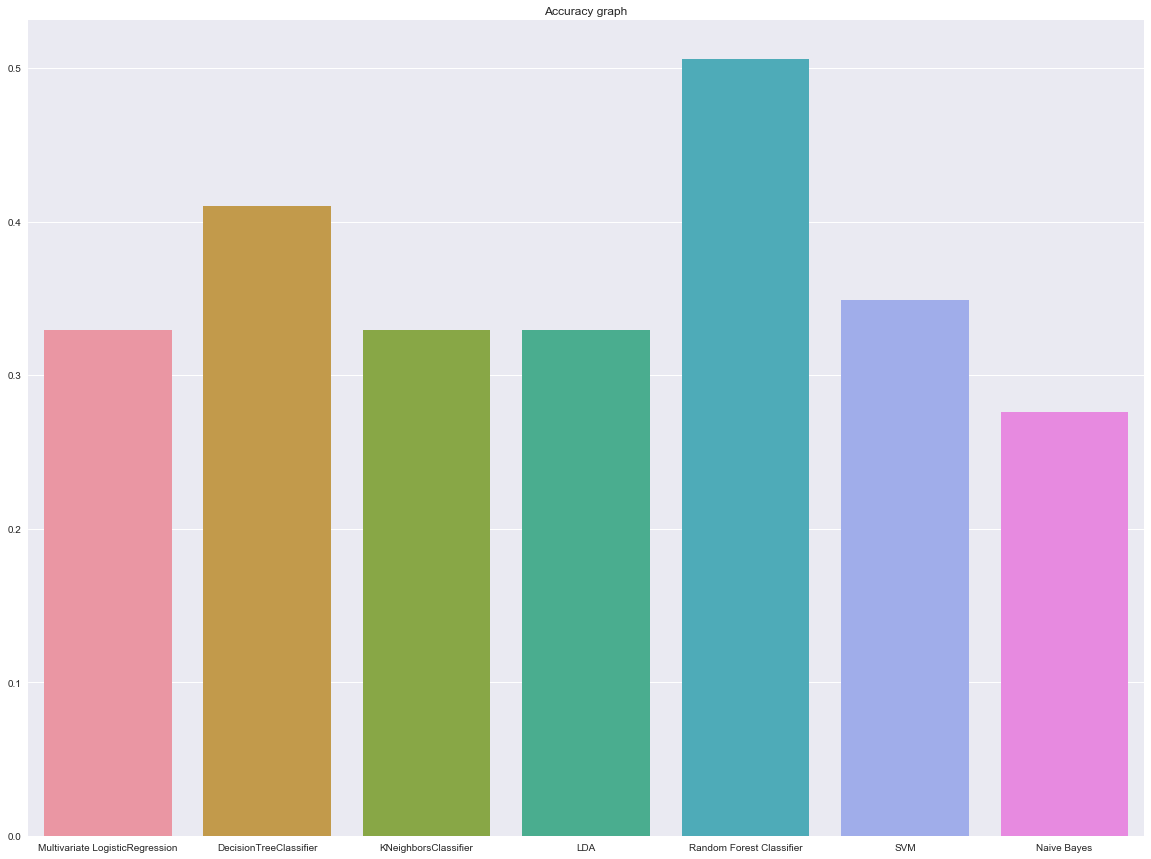

In [50]:
f,ax = plt.subplots(figsize=(20, 15))
sns.barplot(l1,l2)
plt.title('Accuracy graph')
plt.show()

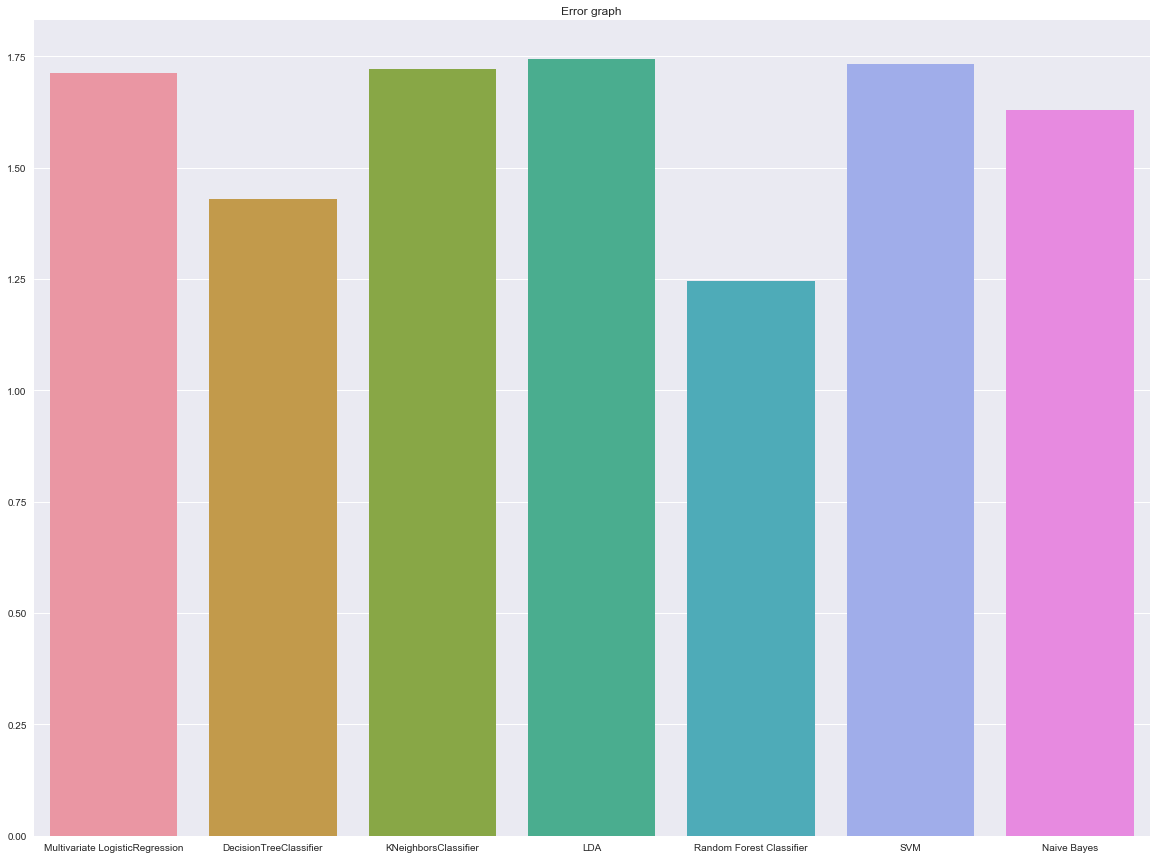

In [51]:
f,ax = plt.subplots(figsize=(20, 15))
sns.barplot(l1,error)
plt.title('Error graph')
plt.show()

After seeing the above results and graph we can say that random forest classifier has performed extremely well than the other multiclass classifiecation algorithm on the given dataset under the given circumstances.Decision Tree Classifier was also good compared to the other classifiers.LDA has predicted most incorrect results compared to the others algorithm on the give dataset. 